<a href="https://colab.research.google.com/github/victorjoseij/2nd-trimester/blob/main/2348570_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv('/content/Program_2_Dataset.csv')

In [3]:
data.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


check if it has null values

In [5]:

data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [6]:
data.shape

(506, 14)

In [7]:
data.corr()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
Crime_Rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
Zone_proportion,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
Non_Retail_Acres,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
Avg_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
Distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
Property_TaxRate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Figure size 1200x1000 with 0 Axes>

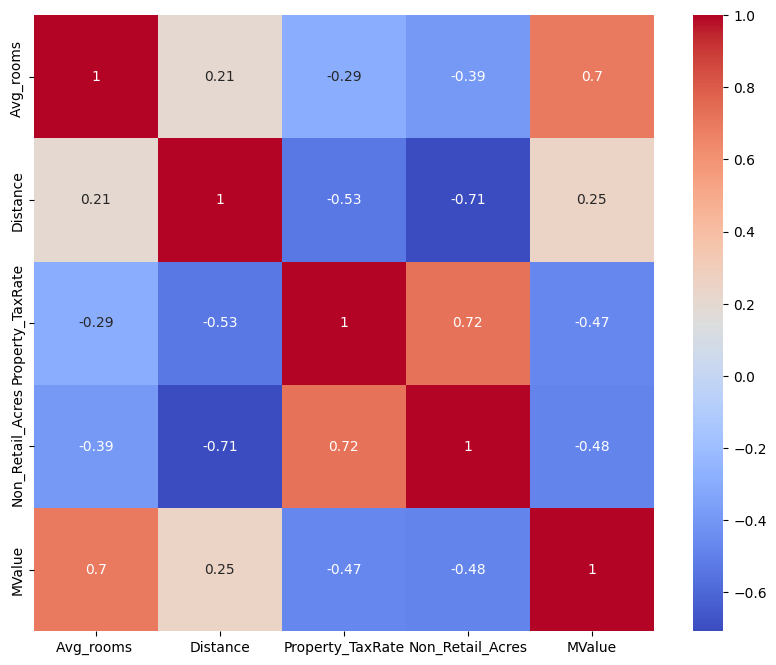

In [8]:
ref=['Avg_rooms ','Distance','Property_TaxRate','Non_Retail_Acres','MValue']
plt.figure(figsize = (12,10))
df = data[ref]
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
feature=['Avg_rooms ','Distance','Property_TaxRate','Non_Retail_Acres']
X=data[feature]
y=data[['MValue']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['columns']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif)

Variance Inflation Factor (VIF):
            columns        VIF
0        Avg_rooms   16.747965
1          Distance   6.880607
2  Property_TaxRate  13.861510
3  Non_Retail_Acres   9.598374


we can see that the Avg_rooms has vif more than 10 it is mostly influential among all

VIF(variance influential factor)

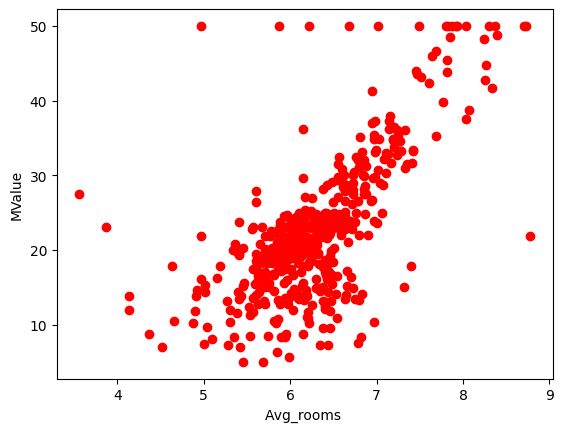

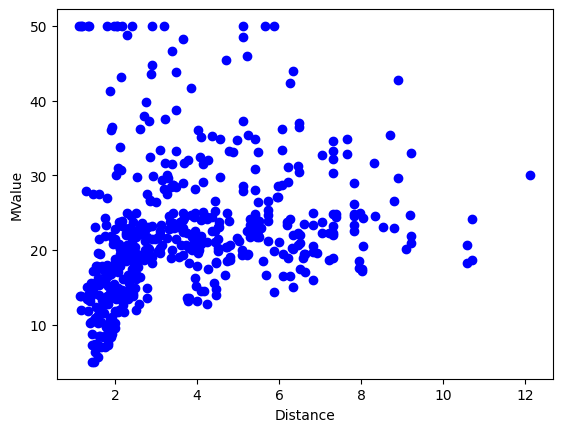

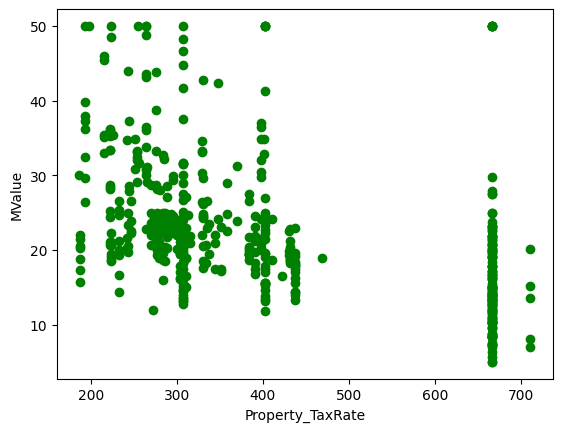

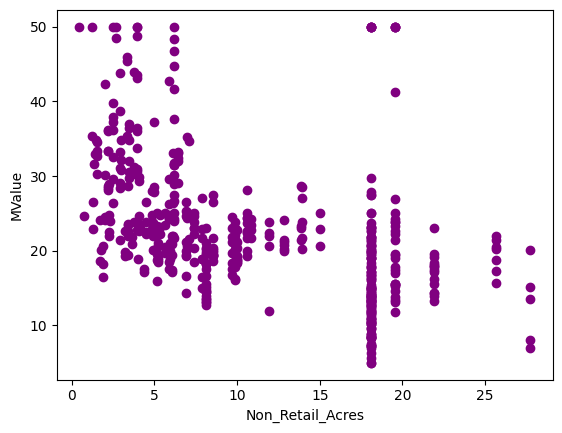

In [10]:
import matplotlib.pyplot as plt
color=['red','blue','green','purple']
j=0
for i in X.columns:
    plt.scatter(X[i],y,color=color[j])
    j+=1
    plt.xlabel(i)
    plt.ylabel('MValue')
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

 data is split into train and test datasets, in the ratio of 67:33.

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [13]:
coefficients =  model.coef_
intercept = model.intercept_

print("Coefficients:",coefficients)

print("Intercept:", intercept)

Coefficients: [[ 7.71823295 -0.65291673 -0.01373718 -0.21258162]]
Intercept: [-15.33221081]


In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_train)
print("Training Score:\n",model.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_train,y_pred))
print("R2 score is:\n",r2_score(y_train,y_pred))

Training Score:
 55.2374742371587
Mean Squared Error:
 40.83615624350907
R2 score is:
 0.552374742371587


In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Mean Squared Error:
 27.569771797553905
R2 score is:
 0.60781481718806


R squared value : r-squared shows how well the data fit the regression model (the goodness of fit).

Formula : 1-RSS/TSS where, RSS - Sum of squares of residuals and TSS - Total sum of squared

Adjusted r squared value : Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model

Adjusted R squared is calculated by dividing the residual mean square error by the total mean square error (which is the sample variance of the target field). The result is then subtracted from 1.

Mean squared error : The Mean Squared Error measures how close a regression line is to a set of data points